In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os   
import sys
sys.path.insert(0,'../../src/utils')
import config as cfg
import utils
import datetime


In [2]:
%matplotlib qt
subject = '002'
# Load filtered raw data
raw = mne.io.read_raw_fif(cfg.fname.filtered(subject=subject))

Opening raw data file ./processed/002-filtered-raw.fif...
    Range : 0 ... 414719 =      0.000 ...   404.999 secs
Ready.


In [3]:
if os.path.isfile(cfg.fname.badChannels_manual(subject=subject)):
    badChannels_ix = utils.load_badChannels(subject, True)
    badChannels = [raw.ch_names[ix] for ix in badChannels_ix]
    print('Bad Channels: {}'.format(badChannels))
    raw.info['bads'].extend(badChannels)
else:
    print('The file for manually annotated bad channels does not exist.')

Bad Channels: []


In [30]:
# Delete existing annotations
badSegments_ix = [i for i,a in enumerate(raw.annotations) if a['description']=="BAD_"]
raw.annotations.delete(badSegments_ix)

In [4]:
# Load existing annotations
if os.path.isfile(cfg.fname.badSegments_manual(subject=subject)):
    badSegments = utils.load_badSegments(subject, True)
    print('Number of annotations: {}'.format(len(badSegments)))
    raw.annotations.append(badSegments.onset,badSegments.duration,badSegments.description)
else:
    print('The file for manually annotated bad channels does not exist.')

Number of annotations: 8


Using matplotlib as 2D backend.


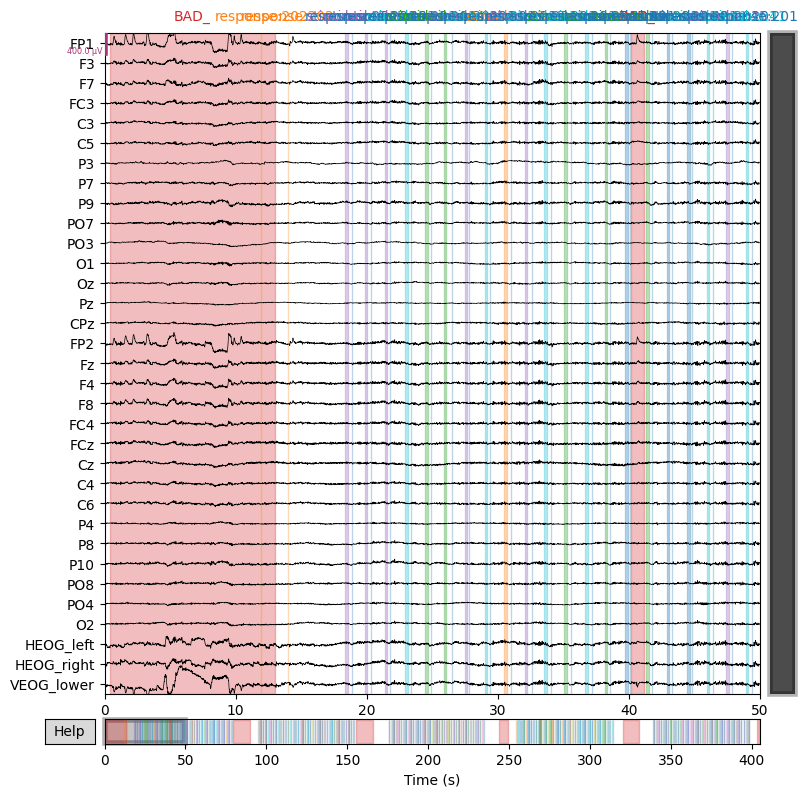

Channels marked as bad:
none


In [5]:
raw.plot(n_channels=len(raw.ch_names),scalings = 20e-5, duration = 50)

In [90]:
# Write bad channels to file
badChannels_ix = [ix for ix, ch in enumerate(raw.ch_names) if ch in raw.info['bads']]

with open(cfg.fname.badChannels_manual(subject=subject), 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow(badChannels_ix)

In [26]:
# Write bad segments to file
badSegments_ix = [i for i,a in enumerate(raw.annotations) if a['description']=="BAD_"]
raw.annotations[badSegments_ix].save(cfg.fname.badSegments_manual_txt(subject=subject), overwrite=True)
os.rename(cfg.fname.badSegments_manual_txt(subject=subject), cfg.fname.badSegments_manual(subject=subject))